In [4]:
"""
A portmanteau word is a blend of two or more words, like 'mathelete', which comes from 'math' and 
'athelete'.  You will write a function to find the 'best' portmanteau word from a list of dictionary 
words. Because 'portmanteau' is so easy to misspell, we will call our function 'natalie' instead:

    natalie(['word', ...]) == 'portmanteauword' 

In this exercise the rules are: a portmanteau must be composed of three non-empty pieces, 
start+mid+end, where both start+mid and mid+end are among the list of words passed in.  For example,
'adolescented' comes from 'adolescent' and 'scented', with start+mid+end='adole'+'scent'+'ed'. 
A portmanteau must be composed of two different words (not the same word twice).

That defines an allowable combination, but which is best? Intuitively, a longer word is better, and a 
word is well-balanced if the mid is about half the total length while start and end are about 1/4 
each. To make that specific, the score for a word w is the number of letters in w minus the 
difference between the actual and ideal lengths of start, mid, and end. (For the example word 
w='adole'+'scent'+'ed', the start,mid,end lengths are 5,5,2 and the total length is 12.  The ideal
start,mid,end lengths are 12/4,12/2,12/4 = 3,6,3. So the final score is

    12 - abs(5-3) - abs(5-6) - abs(2-3) = 8.

yielding a score of 12 - abs(5-(12/4)) - abs(5-(12/2)) - abs(2-(12/4)) = 8.

The output of natalie(words) should be the best portmanteau, or None if there is none. 

Note (1): I got the idea for this question from Darius Bacon.  

Note (2): In real life, many portmanteaux omit letters, for example 'smoke' + 'fog' = 'smog'; we 
aren't considering those.

Note (3): The word 'portmanteau' is itself a portmanteau; it comes from the French "porter" (to carry)
+ "manteau" (cloak), and in English meant "suitcase" in 1871 when Lewis Carroll used it in 'Through 
the Looking Glass' to mean two words packed into one. 

Note (4): the rules for 'best' are certainly subjective, and certainly should depend on more things 
than just letter length.  In addition to programming the solution described here, you are welcome to 
explore your own definition of best, and use your own word lists to come up with interesting new 
results.  Post your best ones in the discussion forum. 

Note (5) The test examples will involve no more than a dozen or so input words. But you could 
implement a method that is efficient with a larger list of words.
"""

from collections import defaultdict

def natalie(words):
    "Find the best Portmanteau word formed from any two of the list of words."
    # First find all (start, mid, end) triples, then find the best scoring one
    
    ends = defaultdict(list)                            # ends是default dictionary
    
    for w in words:                                     #找出每一個word的mid, end
        
        for mid, end in splits(w):                      #用splits()分出mid, end的組合
            
            ends[mid].append(end)                       #放入ends => key是mid, value是end
    
    triples = [(start, mid, end)                        
            for w in words                              #每一個word
            for start, mid in splits(w)                 #先用splits()分出每一個words的start, mid的組合
            for end in ends[mid]                        #再將mid代入ends => 得到合適的end
                                                        # => 找出可以組合而成的所有 start, mid, end的set，如圖1 & 圖2
               
            if w != mid+end]                            # mid+end不可以是某一個word => Ex: word == "test" 
                                                        # => ans.會變成"testest"，如圖3 
                                                        #原本是只有"test" => ans.是"testest" => 不合理
    
    if not triples: 
        
        return None
    
    return ''.join(max(triples, key=portman_score))     #把portman_score最大的start, mid, end的set合起來

def splits(w):
    "Return a list of splits of the word w into two non-empty pieces."
    
    return [(w[:i], w[i:]) for i in range(1, len(w))]   # return list of tuples 
                                                        # Ex: word = "good" => [("g", "ood"), ("go", "od"), ("goo", "d")]

def portman_score(triple):
    "Return the numeric score for a (start, mid, end) triple."
    
    S, M, E = map(len, triple)                           #用len()來return S, M, E的各自length
    
    T = S+M+E                                            # T 是total length
    
    return T - abs(S-T/4.) - abs(M-T/2.) - abs(E-T/4.)   #因instructions規定start應佔0.25, mid應佔0.5, end應佔0.25
                                                         # Ex: T == 12 => 某一triple的 start,mid,end 的 lengths的佔比: 5,5,2
                                                         # => 12 - abs(5-12/4) - abs(5-12/2) - abs(2-12/4) = 8
                                                         # => 此triple的score是8
                                                         # T == 12的情況下，start,mid,end 的 lengths的 best佔比: 3,6,3

def test_natalie():
    "Some test cases for natalie"
    
    assert (natalie(['eskimo', 'escort', 'kimchee', 'kimono', 'cheese']) == 'eskimono')
    
    assert (natalie(['kimono', 'kimchee', 'cheese', 'serious', 'us', 'usage']) == 'kimcheese')
    
    assert (natalie(['circus', 'elephant', 'lion', 'opera', 'phantom']) == 'elephantom')
    
    assert (natalie(['adolescent', 'scented', 'centennial', 'always', 'ado', 'centipede'])
            in ( 'adolescented', 'adolescentennial', 'adolescentipede'))
    
    assert (natalie(['programmer', 'coder', 'partying', 'merrymaking']) == 'programmerrymaking')
    
    assert (natalie(['int', 'intimate', 'hinter', 'hint', 'winter']) == 'hintimate')
    
    assert (natalie(['morass', 'moral', 'assassination']) == 'morassassination')
    
    assert (natalie(['entrepreneur', 'academic', 'doctor', 'neuropsychologist', 'neurotoxin', 
                     'scientist', 'gist']) in ('entrepreneuropsychologist', 'entrepreneurotoxin'))
    
    assert (natalie(['perspicacity', 'cityslicker', 'capability', 'capable']) == 'perspicacityslicker')
    
    assert (natalie(['backfire', 'fireproof', 'backflow', 'flowchart', 'background', 'groundhog']) == 
            'backgroundhog')
    
    assert (natalie(['streaker', 'nudist', 'hippie', 'protestor', 'disturbance', 'cops']) == 
            'nudisturbance')
    
    assert (natalie(['night', 'day']) == None)
    
    assert (natalie(['dog', 'dogs']) == None)
    
    assert (natalie(['test']) == None)
    
    assert (natalie(['']) ==  None)
    
    assert (natalie(['ABC', '123']) == None)
    
    assert (natalie([]) == None)
    
    assert (natalie(['pedestrian', 'pedigree', 'green', 'greenery']) == 'pedigreenery')
    
    assert (natalie(['armageddon', 'pharma', 'karma', 'donald', 'donut']) == 'pharmageddon')
    
    assert (natalie(['lagniappe', 'appendectomy', 'append', 'lapin']) == 'lagniappendectomy')
    
    assert (natalie(['angler', 'fisherman', 'boomerang', 'frisbee', 'rangler', 'ranger', 'rangefinder']) 
            in ('boomerangler', 'boomerangefinder'))
    
    assert (natalie(['freud', 'raelian', 'dianetics', 'jonestown', 'moonies']) == 'freudianetics')
    
    assert (natalie(['atheist', 'math', 'athlete', 'psychopath']) in ('psychopatheist', 'psychopathlete'))
    
    assert (natalie(['hippo', 'hippodrome', 'potato', 'dromedary']) == 'hippodromedary')
    
    assert (natalie(['taxi', 'taxicab', 'cabinet', 'cabin', 'cabriolet', 'axe']) in 
            ('taxicabinet', 'taxicabriolet'))
    
    assert (natalie(['pocketbook', 'bookmark', 'bookkeeper', 'goalkeeper']) in 
            ('pocketbookmark', 'pocketbookkeeper'))
   
    assert (natalie(['athlete', 'psychopath', 'athletic', 'axmurderer']) in 
            ('psychopathlete', 'psychopathletic'))
    
    assert (natalie(['info', 'foibles', 'follicles']) == 'infoibles')
    
    assert (natalie(['moribund', 'bundlers', 'bundt']) == 'moribundlers')
    
    print ("Tests pass")
    
print (test_natalie())

print (natalie(['eskimo', 'escort', 'kimchee', 'kimono', 'cheese']))

Tests pass
None
eskimono


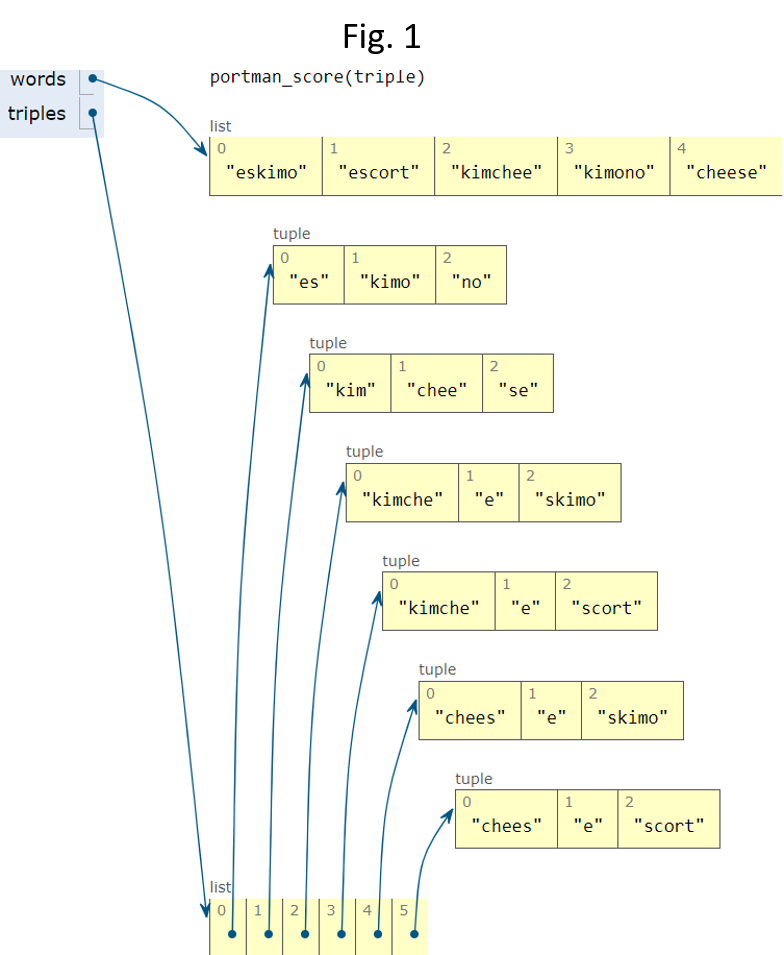

In [1]:
from IPython.display import Image

Image("Desktop\Word Set.png")

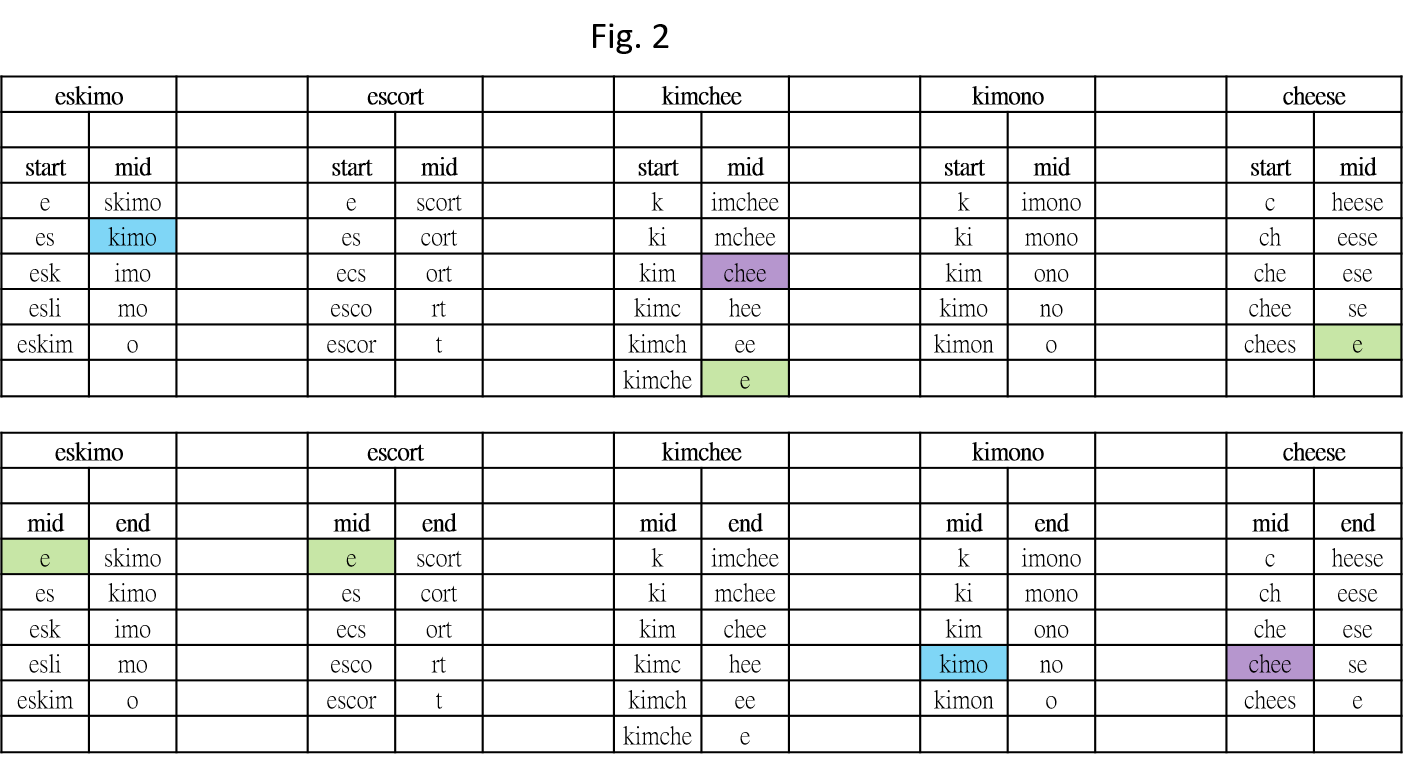

In [2]:
from IPython.display import Image

Image("Desktop\Word Chart.png")

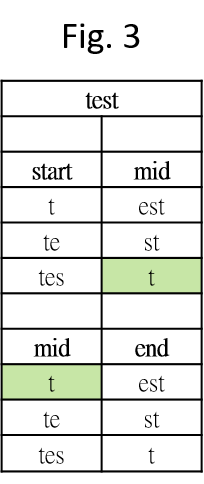

In [3]:
from IPython.display import Image

Image("Desktop\Test.png")